## import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
with open('dataset/final_dataset.pickle', 'rb') as file:
    df = pickle.load(file)

df.head(2)

,userid,age,gender,tenure,friends,request,g_likes,r_likes
0,2094382,14,male,266.0,0,0,0,0
1,1192601,14,female,6.0,0,0,0,0


<hr>

In this section we want to analyze data in Python to answer some ad-hoc questions that might be asked in daily-basis business. 

## 1 - Based on age group, which gender does have more friend?

first we should bin age into some groups.

In [3]:
labels = ['5-10','11-15','16-20','21-25','26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']

df['age_group'] = pd.cut(df['age'], bins = np.arange(5,61,5), labels = labels, right = True)

now let's answer the question:

C:\Users\Mehrdad\AppData\Local\Temp\ipykernel_16980\1685361561.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


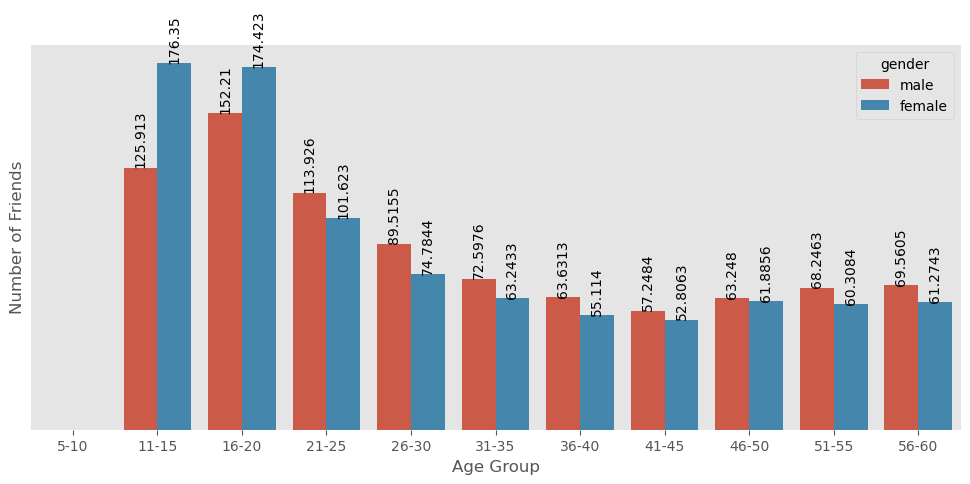

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(
    x=df['age_group'],
    y=df['friends'],
    hue=df['gender'],
    ci=None,
    ax=ax)

#setting of axis
plt.ylabel("Number of Friends")
plt.xlabel("Age Group")
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10, rotation=90)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show()

## 2 - How many people do not have any friends? (based on gender)

First we calculate the number of people who have friend (at least one) and have no friend.

In [6]:
fc = df['friends'] == 0

then we can draw chart:

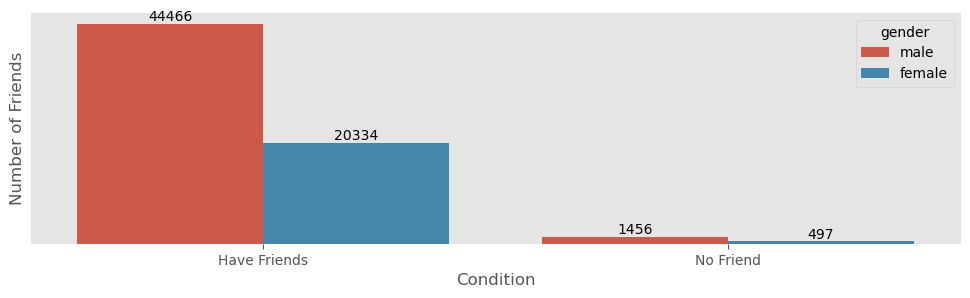

In [7]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.countplot(
    x = fc, 
    hue = df['gender'], 
    ax = ax)

#setting of axis
plt.ylabel("Number of Friends")
plt.xlabel("Condition")
ax.set_xticklabels(['Have Friends', 'No Friend'])
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show()

## 3 - Who did received the most like from other users?

to answer this question, we just need to sort the dataframe based on received like:

In [8]:
df.sort_values(by = 'r_likes', ascending = False)[:5]

,userid,age,gender,tenure,friends,request,g_likes,r_likes,age_group
6400,1479994,21,female,245.0,4,2,121,32,21-25
32788,1651813,14,female,199.0,52,8,0,32,11-15
32603,1873333,97,female,444.0,51,16,22,32,NaN
13147,1730006,27,male,158.0,14,9,156,32,26-30
32640,1386185,54,female,391.0,50,40,31,32,51-55


## 4 - For every single user, calculate how many like did they get per day?

first, we calculate like per day:

In [9]:
df['likes_per_day'] = df['r_likes'] / df['tenure'].where(df['tenure'] > 0)

and then we can sort the data based on like received and then like per day:

In [10]:
famous = df.sort_values(by =['r_likes', 'likes_per_day'], ascending = False)[:5]
famous

,userid,age,gender,tenure,friends,request,g_likes,r_likes,age_group,likes_per_day
18758,1522643,107,male,9.0,22,16,104,32,NaN,3.555556
13111,1109883,58,male,12.0,13,9,71,32,56-60,2.666667
28658,1663920,68,female,12.0,41,39,185,32,NaN,2.666667
21498,1772599,103,female,21.0,28,26,2,32,NaN,1.523810
27618,1155942,23,male,22.0,39,34,26,32,21-25,1.454545


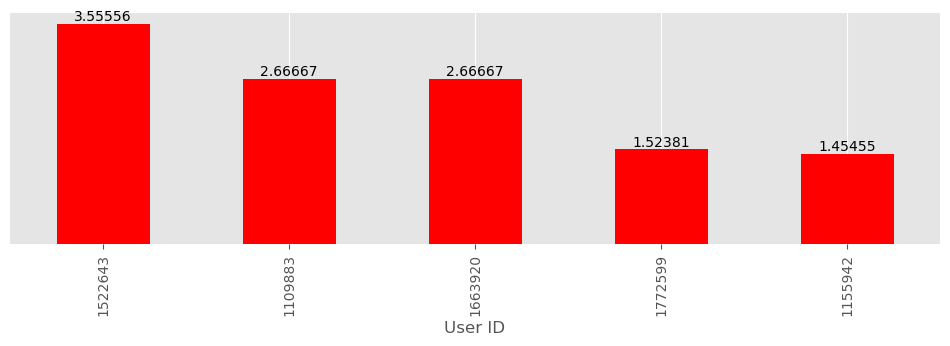

In [11]:
fig, ax = plt.subplots(figsize=(12, 3))

famous.plot(
    x='userid',
    y='likes_per_day',
    kind='bar', 
    color='red',
    ax=ax)

#setting of axis
plt.ylabel("")
plt.xlabel("User ID")
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
#remove the legend 
ax.get_legend().remove()

plt.show()

## 5 - Show the users who are interested in to send friendship request

first we filter dataset based on this condition:

In [12]:
followers = df.sort_values(by = 'request', ascending = False)[:5]
followers

,userid,age,gender,tenure,friends,request,g_likes,r_likes,age_group,likes_per_day
66752,1403953,19,male,519.0,3693,3415,170,20,16-20,0.038536
66707,1531202,23,male,917.0,3328,2817,2,18,21-25,0.019629
66713,2154556,100,male,2473.0,4765,2668,5,1,NaN,0.000404
66721,1758362,18,male,565.0,2917,2279,7,13,16-20,0.023009
66686,1007637,40,male,1278.0,2840,2213,0,6,36-40,0.004695


Then we can draw the plot.

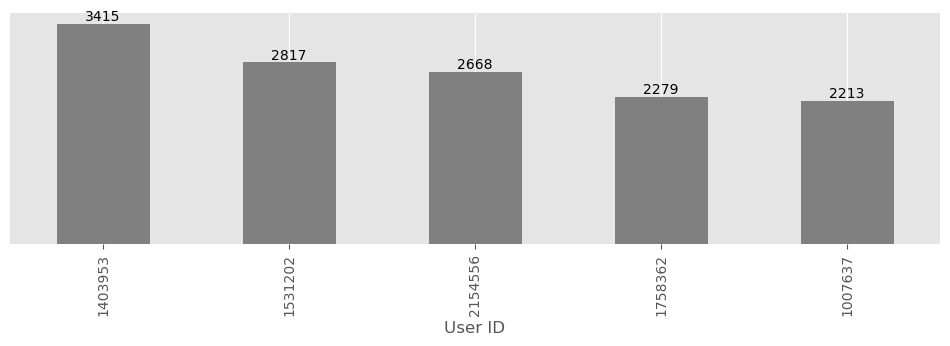

In [13]:
fig, ax = plt.subplots(figsize=(12, 3))

followers.plot(
    x='userid',
    y='request',
    kind='bar', 
    color='gray',
    ax=ax)

#setting of axis
plt.ylabel("")
plt.xlabel("User ID")
plt.yticks([])

#add data lable
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize = 10)

#remove the border
for spine in ax.spines.values():
    spine.set_visible(False)
    
#remove the legend    
ax.get_legend().remove()
    
plt.show()